In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리                                                                                                  
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# CSV 파일 불러오기 

In [19]:
df = pd.read_csv("C:/Users/tansy/Ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Outcome 열 삭제

In [7]:
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## 상관관계 행렬

<Axes: >

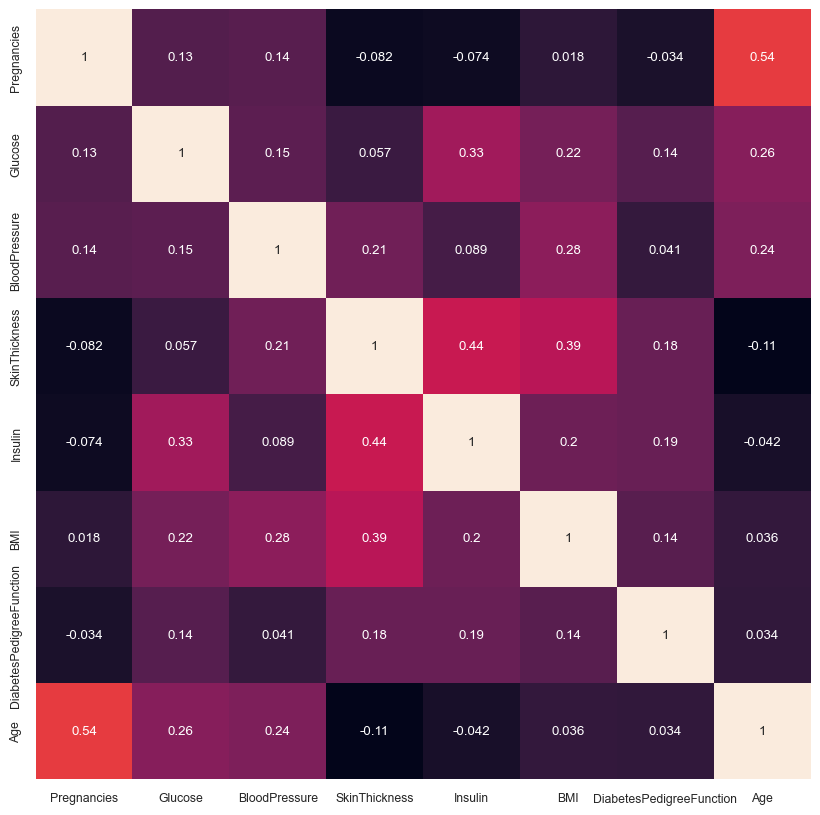

In [12]:
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr = df.corr() # 상관관계 행렬 

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False) # annot는 수치 표시, cbar는 막대 표시 

# BMI와 높은 건  SkinThickness

# 1. 데이터 준비

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X = df.drop('BMI', axis=1) # axis=1은 열이름이란 것을 알려줌 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [21]:
y = df.BMI
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


# 2. 딥러닝 분류 5가지

# 1. LinearRegression

## MSE 정의 및 정확도 분석 및 모델 생성 및 훈련,예측 수행

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # MSE 제공 라이브러리 

# 모델 생성, 훈련, 예측값 산출 
model = LinearRegression() # 1. 생성 
model.fit(X_train, y_train) # 2. 훈련 
ly_preds = model.predict(X_test) # 3. 예측값 산출 

# MSE로 정확도 평가 
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

# MSE 생성 함수 
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 47.945851123910415
평균제곱근오차 47.945851123910415
평균제곱근오차 47.94585112391044


## 산점도를 통한 예측값과 실제 값 비교(X축은 상관관계가 제일 큰 SkinThickness)

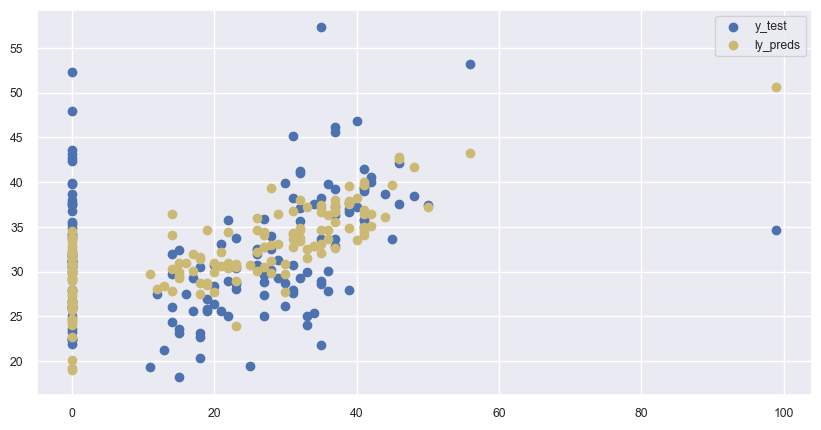

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test') # 
plt.scatter(X_test['SkinThickness'], ly_preds, c='y',label='ly_preds') # label은 범례로 뭘 뜻하는지 우상단에 쓴것 => plt.legend() 함수로 실행
plt.legend()
plt.show()

# 2. 회귀 결정 트리(DecisionTreeRegressor)

In [45]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test) # X_test로 예측값 산출 
print('평균제곱근오차', mean_squared_error(dy_preds, y_test)) # MSC로 정확도 계산(인자 : 예측값, 실제값) 

평균제곱근오차 82.4922077922078


## 산점도를 통한 예측값과 실제 값 비교(X축은 상관관계가 제일 큰 SkinThickness)

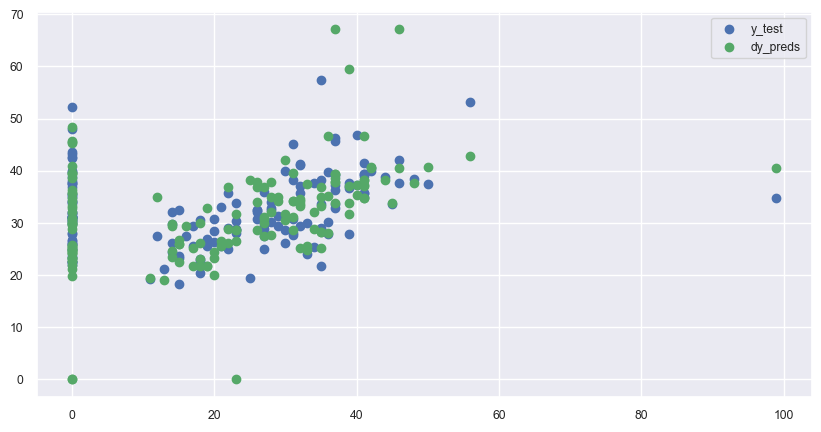

In [48]:
plt.figure(figsize=(10,5)) 
plt.scatter(X_test['SkinThickness'], y_test, label='y_test') # 실제값 분포 
plt.scatter(X_test['SkinThickness'], dy_preds, c='g' ,label='dy_preds') # 예측값 분포
plt.legend()
plt.show()

# 3. 랜덤포레스트회귀

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. 모델 생성 및 훈련 
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 2. 예측값 및 정확도 산출 
ry_preds = model.predict(X_test) # 예측값 
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 41.26168698051947


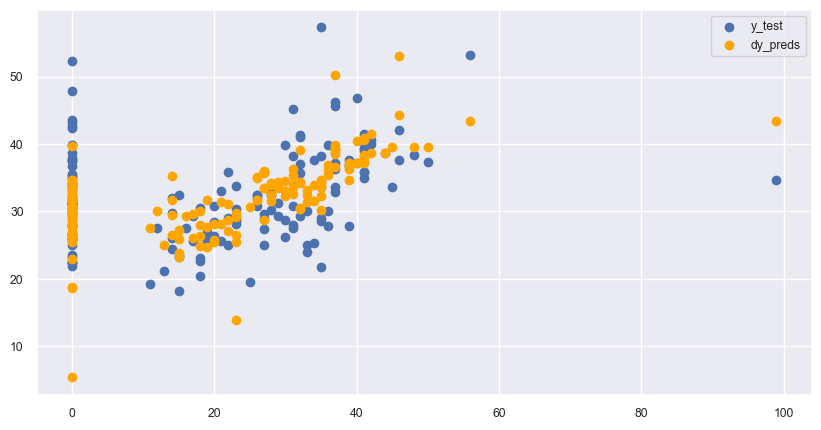

In [54]:
plt.figure(figsize=(10,5)) 
plt.scatter(X_test['SkinThickness'], y_test, label='y_test') # 실제값 분포 
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange' ,label='dy_preds') # 예측값 분포
plt.legend() # 범례 표시 
plt.show()

# 4. SVR(SVM의 회귀 버전) 

In [55]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 46.127621195271104


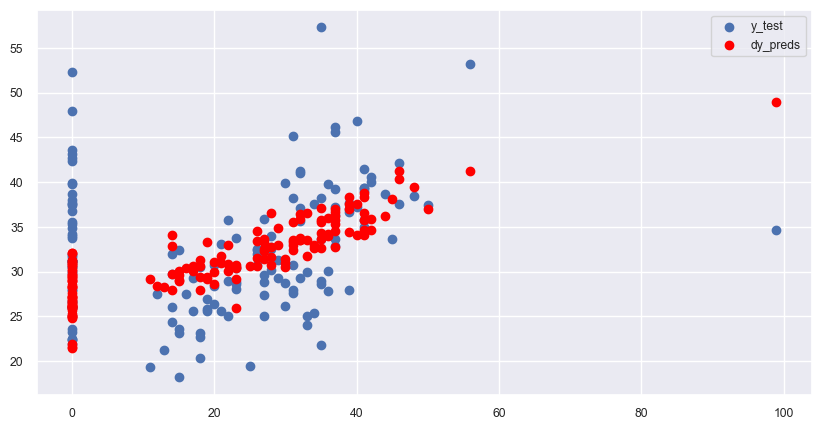

In [57]:
plt.figure(figsize=(10,5)) 
plt.scatter(X_test['SkinThickness'], y_test, label='y_test') # 실제값 분포 
plt.scatter(X_test['SkinThickness'], ry_preds, c='red' ,label='dy_preds') # 예측값 분포
plt.legend() # 범례 표시 
plt.show()

In [60]:
# 5. MLPRegressor <=> MLPClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

model = MLPRegressor()  # 1. 모델 구축  
model.fit(X_train, y_train) # 2. 모델 훈련 

sv_preds = model.predict(X_test) # 3. 예측값 산출

print(mean_squared_error(sv_preds, y_test))

54.84375479051346


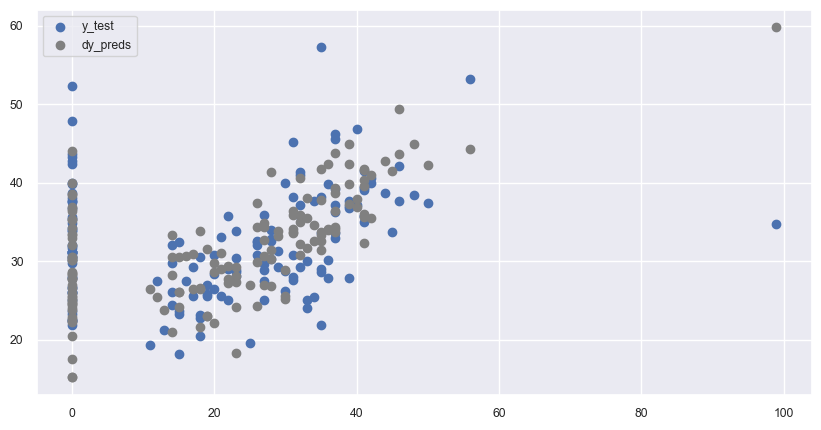

In [62]:
plt.figure(figsize=(10,5)) 
plt.scatter(X_test['SkinThickness'], y_test, label='y_test') # 실제값 분포 
plt.scatter(X_test['SkinThickness'], sv_preds, c='gray' ,label='dy_preds') # 예측값 분포
plt.legend() # 범례 표시 
plt.show()